In [1]:
# import packages
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak
import os
import sys
import hist

# set cms plot style
use_helvet = True  ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

sys.path.append("/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/lib")
from setting import setting

In [2]:
#config_path = "/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/cards/config_UL_alphavalidate_110to135.yml"
year = 2018
import yaml
config_path = f"/cms/user/guojl/ME_test/CMSSW_10_6_26/src/HZZAnalysis/cards/config_UL{year}.yml"
with open( config_path) as f:
    config = yaml.safe_load(f)

year = '2018'

#samples = ['DY_pt50To100','DY_pt100To250','DY_pt250To400','DY_pt400To650','DY_pt650ToInf','TTTo2L2Nu','WWTo2L2Nu','WZTo2Q2L','ZZTo2Q2L','WWTo1L1Nu2Q','tZq','ZZTo2L2Nu','WZTo1L1Nu2Q','ggh1000','ggh500','sig','ggh2000']
#samples = ['DY_pt50To100','DY_pt100To250','DY_pt250To400','DY_pt400To650','DY_pt650ToInf','TTTo2L2Nu','WWTo2L2Nu','WZTo2Q2L','ZZTo2Q2L','tZq','ggh1000','sig']
#samples = ['TTTo2L2Nu','tZq']
samples = ['ggh125','ggh400','ggh450','ggh500','ggh550','ggh600','ggh700','ggh750','ggh800','ggh900','ggh1000','ggh2000','ggh2500','ggh3000',]
#samples = ['DY_pt50To100','DY_pt100To250','DY_pt250To400','DY_pt400To650','DY_pt650ToInf','ggh1000','ggh200','ggh300','ggh500']
#samples = ['TTTo2L2Nu','tZq','WWTo1L1Nu2Q','WZTo1L1Nu2Q','ggh1000','vbf1000','ZZTo2Q2L','WZTo2Q2L']
arr = {}
sumweight = {}
n_events = {}
for sample in samples:
    #arr[sample] = uproot.lazy([f"{setting().fileset[year][sample][0]}:passedEvents"],filter_name = ['jet*','found*','KD*','Met','mass*','isMuMu','isEE'])
    arr[sample] = uproot.lazy([f"{setting().fileset[year][sample][0]}:passedEvents"],filter_name = ['GEN*','p_*'])
    
    f = uproot.open(setting().fileset[year][sample][0])['sumWeights']
    sumweight[sample] = (f.to_boost()).sum()

    f = uproot.open(setting().fileset[year][sample][0])['nEvents']
    n_events[sample] = (f.to_boost()).sum()

    f.close()

Text(0, 1, 'Unity')

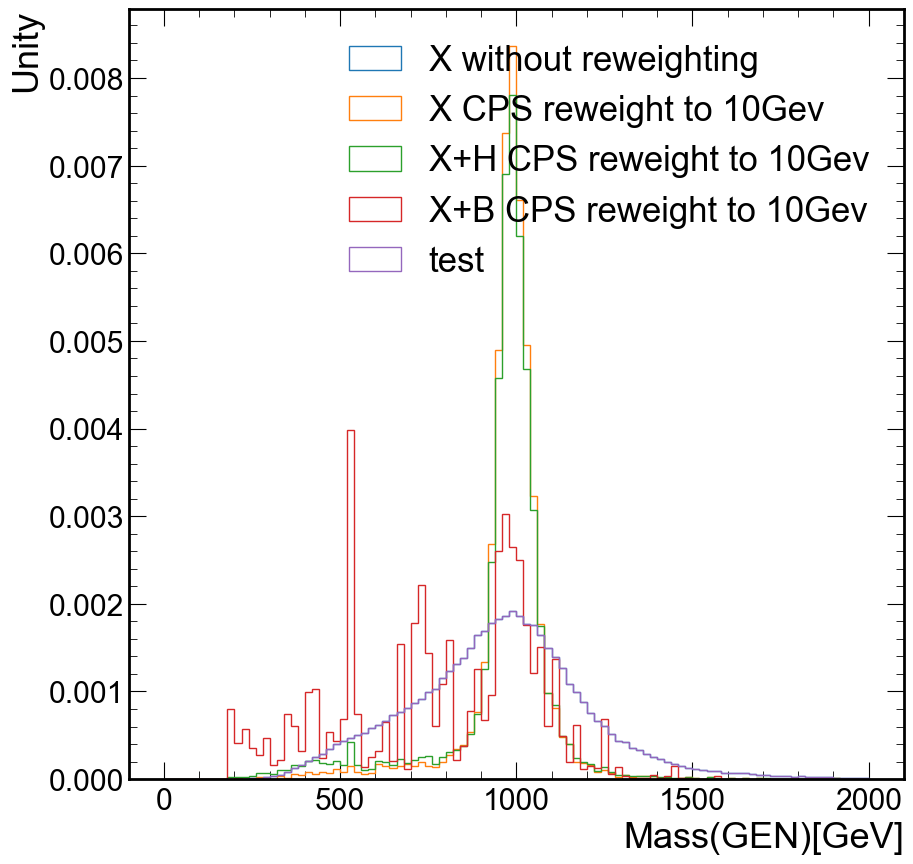

In [3]:
# plot arr[CPStoBW_GaH10_PropRewgt]
sample = 'ggh1000'
ifdensity = True
#temp_array = ak.concatenate([arr['ggh1000'],arr['ggh400']])
temp_array = arr['ggh1000']
min_x_bin = 0; max_x_bin = 2000; n_x_bin = 100
#plt.hist(arr['ggh2000'].GEN_H1_mass, bins=100, range=(0,3000), histtype='step', label='ggh2000',weights=arr['ggh2000'].p_Gen_CPStoBW_GaH200_PropRewgt*arr['ggh2000'].p_Gen_GG_SIG_HM_kappa2TopBot_1_gh2z1_1_MCFM)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X without reweighting',   density=ifdensity)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X CPS reweight to 10Gev',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+H CPS reweight to 10Gev',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_SIG_H125_kappaTopBot_1_ghz1_1_HM_kappa2TopBot_1_gh2z1_1_MCFM/temp_array.p_Gen_GG_SIG_HM_kappa2TopBot_1_gh2z1_1_MCFM)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+B CPS reweight to 10Gev',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_BSI_HM_kappa2TopBot_1_gh2z1_1_MCFM/temp_array.p_Gen_GG_SIG_HM_kappa2TopBot_1_gh2z1_1_MCFM)
plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='test',   density=ifdensity,weights=  temp_array.p_Gen_GG_SIG_HM_kappa2TopBot_1_gh2z1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X to H ',   density=ifdensity,weights=  temp_array.p_Gen_GG_SIG_H125_kappaTopBot_1_ghz1_1_HM_kappa2TopBot_1_gh2z1_1_MCFM/temp_array.p_Gen_GG_SIG_HM_kappa2TopBot_1_gh2z1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+H+B', density=ifdensity,weights=temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_SIG_H125_kappaTopBot_1_ghz1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+B',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_BSI_HM_kappa2TopBot_1_gh2z1_1_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X+B',   density=ifdensity,weights=  temp_array.p_Gen_CPStoBW_GaH10_PropRewgt*temp_array.p_Gen_GG_BKG_MCFM)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X',     density=ifdensity,weights=    temp_array.p_Gen_CPStoBW_GaH10_PropRewgt)
#plt.hist(temp_array.GEN_H1_mass, bins=n_x_bin, range=(min_x_bin,max_x_bin), histtype='step', label='X prue',density=ifdensity)
plt.legend(loc='upper right',fontsize=25,fancybox=True,shadow=True)
plt.xlabel('Mass(GEN)[GeV]')
plt.ylabel('Unity')
#add text to note mass X = 2000 GeV in the middle of the plot
#plt.text(2500, 0.007, 'mX = 2000 GeV', fontsize=20)
#plt.text(2500, 0.0064, r'$\Gamma(X)  = 100 GeV$', fontsize=20)